In [1]:
import pandas as pd
import joblib
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('emails.csv')
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
text    5728 non-null object
spam    5728 non-null int64
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


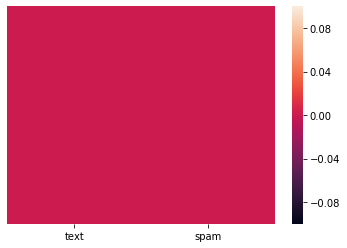

In [4]:
sns.heatmap(df.isnull(),  yticklabels=False)

In [5]:
df.isnull().sum()

text    0
spam    0
dtype: int64

In [6]:
df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


0    4360
1    1368
Name: spam, dtype: int64

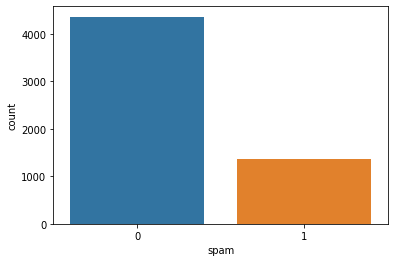

In [7]:
sns.countplot(x = "spam", data = df)
df["spam"].value_counts()

In [8]:
df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [10]:
hamdf=df[df['spam']==0]
spamdf=df[df['spam']==1]


In [11]:
spamdf=spamdf.sample(hamdf.shape[0],replace=True)

final_dataframe=pd.concat([hamdf,spamdf],axis=0)
final_dataframe["spam"].value_counts()


1    4360
0    4360
Name: spam, dtype: int64

In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(final_dataframe["text"],final_dataframe["spam"],test_size=0.2,random_state=0,shuffle=True)

In [13]:
import catboost
from catboost import CatBoostClassifier
import time
start=time.time()

model=Pipeline([('tfidf',TfidfVectorizer()),("Alg",CatBoostClassifier())])

model.fit(X_train,Y_train)
end=time.time()
print(f"Training Time=={end-start}")

Learning rate set to 0.023613
0:	learn: 0.6558452	total: 1.06s	remaining: 17m 42s
1:	learn: 0.6215184	total: 1.8s	remaining: 14m 57s
2:	learn: 0.5901363	total: 2.49s	remaining: 13m 48s
3:	learn: 0.5611580	total: 3.25s	remaining: 13m 28s
4:	learn: 0.5358387	total: 3.91s	remaining: 12m 58s
5:	learn: 0.5116966	total: 4.77s	remaining: 13m 10s
6:	learn: 0.4885811	total: 5.46s	remaining: 12m 54s
7:	learn: 0.4679057	total: 6.07s	remaining: 12m 33s
8:	learn: 0.4495681	total: 6.71s	remaining: 12m 19s
9:	learn: 0.4330900	total: 7.36s	remaining: 12m 8s
10:	learn: 0.4168160	total: 7.96s	remaining: 11m 56s
11:	learn: 0.4028478	total: 8.59s	remaining: 11m 47s
12:	learn: 0.3895099	total: 9.21s	remaining: 11m 39s
13:	learn: 0.3775210	total: 9.89s	remaining: 11m 36s
14:	learn: 0.3658041	total: 10.5s	remaining: 11m 30s
15:	learn: 0.3543335	total: 11.2s	remaining: 11m 28s
16:	learn: 0.3444039	total: 11.9s	remaining: 11m 25s
17:	learn: 0.3346329	total: 12.5s	remaining: 11m 19s
18:	learn: 0.3263228	total: 

155:	learn: 0.1028181	total: 1m 39s	remaining: 8m 58s
156:	learn: 0.1024824	total: 1m 40s	remaining: 8m 57s
157:	learn: 0.1021840	total: 1m 40s	remaining: 8m 56s
158:	learn: 0.1019438	total: 1m 41s	remaining: 8m 55s
159:	learn: 0.1016217	total: 1m 41s	remaining: 8m 55s
160:	learn: 0.1012407	total: 1m 42s	remaining: 8m 54s
161:	learn: 0.1010280	total: 1m 43s	remaining: 8m 53s
162:	learn: 0.1005947	total: 1m 43s	remaining: 8m 52s
163:	learn: 0.1005045	total: 1m 44s	remaining: 8m 51s
164:	learn: 0.1002250	total: 1m 44s	remaining: 8m 50s
165:	learn: 0.1001126	total: 1m 45s	remaining: 8m 49s
166:	learn: 0.0996990	total: 1m 46s	remaining: 8m 49s
167:	learn: 0.0995107	total: 1m 46s	remaining: 8m 48s
168:	learn: 0.0991159	total: 1m 47s	remaining: 8m 47s
169:	learn: 0.0987253	total: 1m 47s	remaining: 8m 46s
170:	learn: 0.0984650	total: 1m 48s	remaining: 8m 46s
171:	learn: 0.0979896	total: 1m 49s	remaining: 8m 46s
172:	learn: 0.0978904	total: 1m 50s	remaining: 8m 46s
173:	learn: 0.0976789	total:

308:	learn: 0.0761794	total: 3m 11s	remaining: 7m 9s
309:	learn: 0.0761215	total: 3m 12s	remaining: 7m 8s
310:	learn: 0.0760353	total: 3m 13s	remaining: 7m 7s
311:	learn: 0.0758641	total: 3m 13s	remaining: 7m 7s
312:	learn: 0.0757088	total: 3m 14s	remaining: 7m 6s
313:	learn: 0.0755812	total: 3m 14s	remaining: 7m 5s
314:	learn: 0.0753141	total: 3m 15s	remaining: 7m 5s
315:	learn: 0.0750324	total: 3m 16s	remaining: 7m 4s
316:	learn: 0.0749900	total: 3m 16s	remaining: 7m 3s
317:	learn: 0.0747807	total: 3m 17s	remaining: 7m 3s
318:	learn: 0.0746634	total: 3m 17s	remaining: 7m 2s
319:	learn: 0.0746271	total: 3m 18s	remaining: 7m 1s
320:	learn: 0.0743981	total: 3m 19s	remaining: 7m 1s
321:	learn: 0.0743539	total: 3m 19s	remaining: 7m
322:	learn: 0.0740705	total: 3m 20s	remaining: 6m 59s
323:	learn: 0.0740287	total: 3m 20s	remaining: 6m 58s
324:	learn: 0.0739907	total: 3m 21s	remaining: 6m 58s
325:	learn: 0.0737807	total: 3m 22s	remaining: 6m 57s
326:	learn: 0.0737387	total: 3m 22s	remaining

461:	learn: 0.0611470	total: 4m 42s	remaining: 5m 29s
462:	learn: 0.0608590	total: 4m 43s	remaining: 5m 28s
463:	learn: 0.0608366	total: 4m 44s	remaining: 5m 28s
464:	learn: 0.0607087	total: 4m 44s	remaining: 5m 27s
465:	learn: 0.0606437	total: 4m 45s	remaining: 5m 26s
466:	learn: 0.0603592	total: 4m 45s	remaining: 5m 26s
467:	learn: 0.0603209	total: 4m 46s	remaining: 5m 25s
468:	learn: 0.0599134	total: 4m 47s	remaining: 5m 25s
469:	learn: 0.0598762	total: 4m 47s	remaining: 5m 24s
470:	learn: 0.0595899	total: 4m 48s	remaining: 5m 23s
471:	learn: 0.0593711	total: 4m 48s	remaining: 5m 23s
472:	learn: 0.0593490	total: 4m 49s	remaining: 5m 22s
473:	learn: 0.0593097	total: 4m 50s	remaining: 5m 21s
474:	learn: 0.0592143	total: 4m 50s	remaining: 5m 21s
475:	learn: 0.0591925	total: 4m 51s	remaining: 5m 20s
476:	learn: 0.0590821	total: 4m 51s	remaining: 5m 19s
477:	learn: 0.0589081	total: 4m 52s	remaining: 5m 19s
478:	learn: 0.0588867	total: 4m 52s	remaining: 5m 18s
479:	learn: 0.0586107	total:

615:	learn: 0.0465686	total: 6m 15s	remaining: 3m 54s
616:	learn: 0.0465534	total: 6m 16s	remaining: 3m 53s
617:	learn: 0.0465134	total: 6m 16s	remaining: 3m 52s
618:	learn: 0.0463711	total: 6m 17s	remaining: 3m 52s
619:	learn: 0.0461347	total: 6m 17s	remaining: 3m 51s
620:	learn: 0.0460070	total: 6m 18s	remaining: 3m 51s
621:	learn: 0.0458676	total: 6m 19s	remaining: 3m 50s
622:	learn: 0.0458426	total: 6m 19s	remaining: 3m 49s
623:	learn: 0.0458170	total: 6m 20s	remaining: 3m 49s
624:	learn: 0.0457934	total: 6m 20s	remaining: 3m 48s
625:	learn: 0.0457359	total: 6m 21s	remaining: 3m 48s
626:	learn: 0.0456209	total: 6m 22s	remaining: 3m 47s
627:	learn: 0.0455961	total: 6m 23s	remaining: 3m 46s
628:	learn: 0.0455808	total: 6m 23s	remaining: 3m 46s
629:	learn: 0.0455574	total: 6m 24s	remaining: 3m 45s
630:	learn: 0.0454997	total: 6m 24s	remaining: 3m 45s
631:	learn: 0.0453514	total: 6m 25s	remaining: 3m 44s
632:	learn: 0.0453366	total: 6m 25s	remaining: 3m 43s
633:	learn: 0.0453110	total:

768:	learn: 0.0384832	total: 7m 46s	remaining: 2m 20s
769:	learn: 0.0384655	total: 7m 47s	remaining: 2m 19s
770:	learn: 0.0384442	total: 7m 47s	remaining: 2m 18s
771:	learn: 0.0384266	total: 7m 48s	remaining: 2m 18s
772:	learn: 0.0383216	total: 7m 49s	remaining: 2m 17s
773:	learn: 0.0383040	total: 7m 49s	remaining: 2m 17s
774:	learn: 0.0382672	total: 7m 50s	remaining: 2m 16s
775:	learn: 0.0381146	total: 7m 50s	remaining: 2m 15s
776:	learn: 0.0380676	total: 7m 51s	remaining: 2m 15s
777:	learn: 0.0380490	total: 7m 51s	remaining: 2m 14s
778:	learn: 0.0380253	total: 7m 52s	remaining: 2m 14s
779:	learn: 0.0380146	total: 7m 53s	remaining: 2m 13s
780:	learn: 0.0378506	total: 7m 53s	remaining: 2m 12s
781:	learn: 0.0378318	total: 7m 54s	remaining: 2m 12s
782:	learn: 0.0377331	total: 7m 54s	remaining: 2m 11s
783:	learn: 0.0377225	total: 7m 55s	remaining: 2m 10s
784:	learn: 0.0376133	total: 7m 56s	remaining: 2m 10s
785:	learn: 0.0375931	total: 7m 56s	remaining: 2m 9s
786:	learn: 0.0375547	total: 

922:	learn: 0.0317073	total: 9m 21s	remaining: 46.9s
923:	learn: 0.0316995	total: 9m 22s	remaining: 46.3s
924:	learn: 0.0316917	total: 9m 23s	remaining: 45.6s
925:	learn: 0.0316315	total: 9m 23s	remaining: 45s
926:	learn: 0.0316238	total: 9m 24s	remaining: 44.4s
927:	learn: 0.0316106	total: 9m 24s	remaining: 43.8s
928:	learn: 0.0315972	total: 9m 25s	remaining: 43.2s
929:	learn: 0.0315820	total: 9m 26s	remaining: 42.6s
930:	learn: 0.0315615	total: 9m 26s	remaining: 42s
931:	learn: 0.0315539	total: 9m 27s	remaining: 41.4s
932:	learn: 0.0315411	total: 9m 28s	remaining: 40.8s
933:	learn: 0.0315335	total: 9m 28s	remaining: 40.2s
934:	learn: 0.0315260	total: 9m 29s	remaining: 39.6s
935:	learn: 0.0314768	total: 9m 29s	remaining: 39s
936:	learn: 0.0314693	total: 9m 30s	remaining: 38.4s
937:	learn: 0.0314619	total: 9m 31s	remaining: 37.8s
938:	learn: 0.0313680	total: 9m 31s	remaining: 37.2s
939:	learn: 0.0312988	total: 9m 32s	remaining: 36.5s
940:	learn: 0.0312774	total: 9m 33s	remaining: 35.9s

In [14]:
Y_pred=model.predict(X_test)
for i in Y_pred:
    if i=="spam":
        print("spam")
    else:
        print("Ham")

Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham


In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred)



array([[842,  36],
       [  0, 866]], dtype=int64)

In [16]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       878
           1       0.96      1.00      0.98       866

    accuracy                           0.98      1744
   macro avg       0.98      0.98      0.98      1744
weighted avg       0.98      0.98      0.98      1744



In [17]:
cnf=confusion_matrix(Y_test,Y_pred)

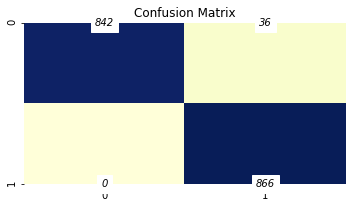

In [18]:
plt.figure(figsize = (5, 5))
annot_kws={'fontsize':10,'fontstyle':'italic','color':"k",'va':'center',"ha":'center','alpha':1,'backgroundcolor':'w'
}
sns.heatmap(pd.DataFrame(confusion_matrix(Y_test,Y_pred)),annot=True, cmap="YlGnBu" ,fmt="d",annot_kws=annot_kws,square=True,cbar=False)
plt.tight_layout()
plt.title("Confusion Matrix")
plt.ylabel=("Actual Labels")
plt.xlabel= ("Predicted Labels")
plt.show()

In [19]:
df1 = Y_pred

In [20]:
df1 = pd.DataFrame(df1)

In [21]:
df1.rename(columns={0: "Predicted Emails"}, inplace=True)
df1

,Predicted Emails
0,0
1,1
2,0
3,1
4,1
...,...
1739,1
1740,0
1741,0
1742,1


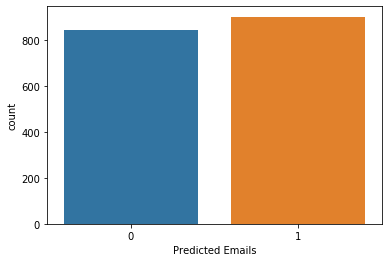

In [22]:
sns.countplot(x = "Predicted Emails", data = df1)
plt.show()


In [23]:
from sklearn.metrics import accuracy_score

In [24]:
print(accuracy_score(Y_test,Y_pred))

0.9793577981651376
